In [1]:
import pandas as pd
import glob, os    
import numpy as np
from pandas.tseries.offsets import MonthBegin

# visualisation
import matplotlib.pyplot as plt

In [2]:
df_electricity = pd.read_csv("dataset/electricity_data_2019_2020.csv", index_col=None, header=0)
df_electricity

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2019/02/01 00:30:00,4012.27,100.97,TRADE
1,VIC1,2019/02/01 01:00:00,3879.38,86.00,TRADE
2,VIC1,2019/02/01 01:30:00,3810.66,113.73,TRADE
3,VIC1,2019/02/01 02:00:00,3683.81,95.01,TRADE
4,VIC1,2019/02/01 02:30:00,3656.39,82.59,TRADE
...,...,...,...,...,...
29227,VIC1,2020/02/29 22:00:00,4338.92,48.74,TRADE
29228,VIC1,2020/02/29 22:30:00,4259.62,48.34,TRADE
29229,VIC1,2020/02/29 23:00:00,4293.57,45.76,TRADE
29230,VIC1,2020/02/29 23:30:00,4487.10,65.20,TRADE


In [3]:
df_entertainment = pd.read_csv("dataset/entertainment/entertainment.csv", index_col=None, header=0)

In [4]:
extracted_dates = df_electricity['SETTLEMENTDATE'].str.partition()
dates = pd.DataFrame({'Date': extracted_dates[0].str.split().str[-1], 'TOTALDEMAND': df_electricity['TOTALDEMAND'], 'RRP': df_electricity['RRP']})
dates

,Date,TOTALDEMAND,RRP
0,2019/02/01,4012.27,100.97
1,2019/02/01,3879.38,86.00
2,2019/02/01,3810.66,113.73
3,2019/02/01,3683.81,95.01
4,2019/02/01,3656.39,82.59
...,...,...,...
29227,2020/02/29,4338.92,48.74
29228,2020/02/29,4259.62,48.34
29229,2020/02/29,4293.57,45.76
29230,2020/02/29,4487.10,65.20


In [5]:
dates['Date'] = pd.to_datetime(dates['Date'])
monthly_dates = dates.groupby(pd.Grouper(key='Date', freq='1M')).sum().reset_index()

In [6]:
monthly_dates['Date']

0    2019-01-31
1    2019-02-28
2    2019-03-31
3    2019-04-30
4    2019-05-31
5    2019-06-30
6    2019-07-31
7    2019-08-31
8    2019-09-30
9    2019-10-31
10   2019-11-30
11   2019-12-31
12   2020-01-31
13   2020-02-29
14   2020-03-31
15   2020-04-30
16   2020-05-31
17   2020-06-30
18   2020-07-31
19   2020-08-31
20   2020-09-30
Name: Date, dtype: datetime64[ns]

In [7]:
# pd.to_datetime(df_entertainment['Period'])
df_entertainment['Period'] = pd.to_datetime(df_entertainment['Period'].astype(str), format='%m-%y') + pd.offsets.MonthEnd()

In [8]:
df_entertainment

,Period,facebook,youtube,instagram,twitter,linkedin,TV subscription
0,2019-01-31,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
1,2019-02-28,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
2,2019-03-31,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
3,2019-04-30,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
4,2019-05-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
5,2019-06-30,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
6,2019-07-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
7,2019-08-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
8,2019-09-30,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
9,2019-10-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"


In [9]:
df_entertainment.set_index('Period')

,facebook,youtube,instagram,twitter,linkedin,TV subscription
Period,,,,,,
2019-01-31,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
2019-02-28,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
2019-03-31,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
2019-04-30,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
2019-05-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
2019-06-30,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
2019-07-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
2019-08-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
2019-09-30,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"


In [10]:
monthly_dates.set_index('Date')

,TOTALDEMAND,RRP
Date,,
2019-01-31,7547832.97,372365.36
2019-02-28,6503847.22,149408.86
2019-03-31,7230454.55,195057.41
2019-04-30,6517588.48,141803.21
2019-05-31,7389540.08,136752.22
2019-06-30,7778882.93,146639.87
2019-07-31,7995280.19,127813.79
2019-08-31,7927730.26,156111.28
2019-09-30,6977003.92,150903.29


In [11]:
monthly_dates.update(df_entertainment)
monthly_dates

,Date,TOTALDEMAND,RRP
0,2019-01-31,7547832.97,372365.36
1,2019-02-28,6503847.22,149408.86
2,2019-03-31,7230454.55,195057.41
3,2019-04-30,6517588.48,141803.21
4,2019-05-31,7389540.08,136752.22
5,2019-06-30,7778882.93,146639.87
6,2019-07-31,7995280.19,127813.79
7,2019-08-31,7927730.26,156111.28
8,2019-09-30,6977003.92,150903.29
9,2019-10-31,6878696.11,149878.52


In [12]:
df_entertainment

,Period,facebook,youtube,instagram,twitter,linkedin,TV subscription
0,2019-01-31,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
1,2019-02-28,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
2,2019-03-31,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
3,2019-04-30,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
4,2019-05-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
5,2019-06-30,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
6,2019-07-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
7,2019-08-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
8,2019-09-30,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
9,2019-10-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"


In [13]:
df_entertainment.rename(columns={'Period': 'Date'}, inplace=True)

In [14]:
df_entertainment

,Date,facebook,youtube,instagram,twitter,linkedin,TV subscription
0,2019-01-31,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
1,2019-02-28,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
2,2019-03-31,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
3,2019-04-30,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000"
4,2019-05-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
5,2019-06-30,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
6,2019-07-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
7,2019-08-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
8,2019-09-30,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"
9,2019-10-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000"


In [15]:
mergedStuff = pd.merge(df_entertainment, monthly_dates, on=['Date'], how='inner')
mergedStuff

,Date,facebook,youtube,instagram,twitter,linkedin,TV subscription,TOTALDEMAND,RRP
0,2019-01-31,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000",7547832.97,372365.36
1,2019-02-28,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000",6503847.22,149408.86
2,2019-03-31,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000",7230454.55,195057.41
3,2019-04-30,"15,000,000","15,000,000","9,000,000","4,700,000","4,500,000","13,966,000",6517588.48,141803.21
4,2019-05-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000",7389540.08,136752.22
5,2019-06-30,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000",7778882.93,146639.87
6,2019-07-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000",7995280.19,127813.79
7,2019-08-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000",7927730.26,156111.28
8,2019-09-30,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000",6977003.92,150903.29
9,2019-10-31,"15,000,000","15,000,000","9,000,000","5,300,000","5,500,000","13,966,000",6878696.11,149878.52


In [16]:
mergedStuff['facebook'] = mergedStuff['facebook'].str.replace(',', '').astype(np.int64)
mergedStuff['youtube'] = mergedStuff['youtube'].str.replace(',', '').astype(np.int64)
mergedStuff['instagram'] = mergedStuff['instagram'].str.replace(',', '').astype(np.int64)
mergedStuff['linkedin'] = mergedStuff['linkedin'].str.replace(',', '').astype(np.int64)
mergedStuff['TV subscription'] = mergedStuff['TV subscription'].str.replace(',', '').astype(np.int64)


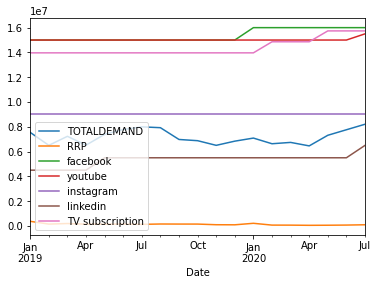

In [17]:
ax = plt.gca()

mergedStuff.plot(kind='line',x='Date',y='TOTALDEMAND',ax=ax)
mergedStuff.plot(kind='line',x='Date',y='RRP',ax=ax)
mergedStuff.plot(kind='line',x='Date',y='facebook',ax=ax)
mergedStuff.plot(kind='line',x='Date',y='youtube',ax=ax)
mergedStuff.plot(kind='line',x='Date',y='instagram',ax=ax)
mergedStuff.plot(kind='line',x='Date',y='linkedin',ax=ax)
mergedStuff.plot(kind='line',x='Date',y='TV subscription',ax=ax)
plt.show()

In [18]:
mergedStuff.plot(kind='line',x='Date',y='TOTALDEMAND',ax=ax)
plt.show()